In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import calendar
import ssl
from tqdm import tqdm
from time import strptime


In [2]:
# settings
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)
plt.rcParams['figure.figsize'] = (11, 8)
plt.style.use('fivethirtyeight')
DPI=100
LW=3

***
# S&P 500 Components Correlation Analysis

In [3]:
# Start and End date of data download
start = datetime(2014, 1, 1)
end = datetime(2020, 12, 1)

In [4]:
# Downloading lost of S&P500 stocks from Wikipedia
ssl._create_default_https_context = ssl._create_unverified_context
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
syms=df.Symbol.values
syms=[x.replace('.','-') for x in syms]

In [5]:
# excldue following symbols because of low number of observations
Exclue=['CARR','CTVA','DOW','FTV','FOXA','FOX','HPE','HWM','IR','LW','LUMN','OTIS','VIAC','VNT']
syms=[sym for sym in syms if sym not in()]

In [6]:
def download_stocks(syms,benchmark_symbol, start,end,save=True):
    # ---Input:
    # syms: List of stock symbols
    # benchmark_symbol: sybmol of benchmark comparison (like SPY )
    # start: start date for data download 
    # end: end date for data download
    # ---Output:
    # data: data matrix
    # spy: S&P500 etf
    # benchmark S&P 500 etf
    df_b = web.DataReader(benchmark_symbol, 'yahoo', start, end)
    data=pd.DataFrame(columns=syms,index=df_b.index)
    for sym in tqdm(syms):
        # downloading daily data
        stock = web.DataReader(sym, 'yahoo', start, end)
        data.loc[stock.index,sym]=stock.Close
    if save:
        # dave data to local disk
        data.to_csv('downloaded_data.csv')
    return data,df_b
    

In [7]:
def median_cor(df,method):
    # ---Input:
    # df: Dataframe containing time serires of the stocks
    # method: correlation calculation method 
    # ---Output:
    # median correlation of the stocks in the selected time frame
    corr_df = df.dropna(axis=1).astype(float).corr(method=method).abs()
    np.fill_diagonal(corr_df.values, np.nan)
    return np.nanmedian(corr_df.values)

In [8]:
# download historical stock data
data,spy=download_stocks(syms,'SPY', start,end)

100%|█████████████████████████████████████████████████████████████████████████████| 505/505 [13:40<00:00,  1.62s/it]


In [9]:
window=30
cor_df = pd.DataFrame(index = spy.index[window:])
cor_df['corr'] = [median_cor(data.iloc[i-window:i,:],'spearman') for i in range(window,len(data))]

In [10]:
spy['return']=spy['Adj Close'].pct_change()

C:\Users\Dr.Amir\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


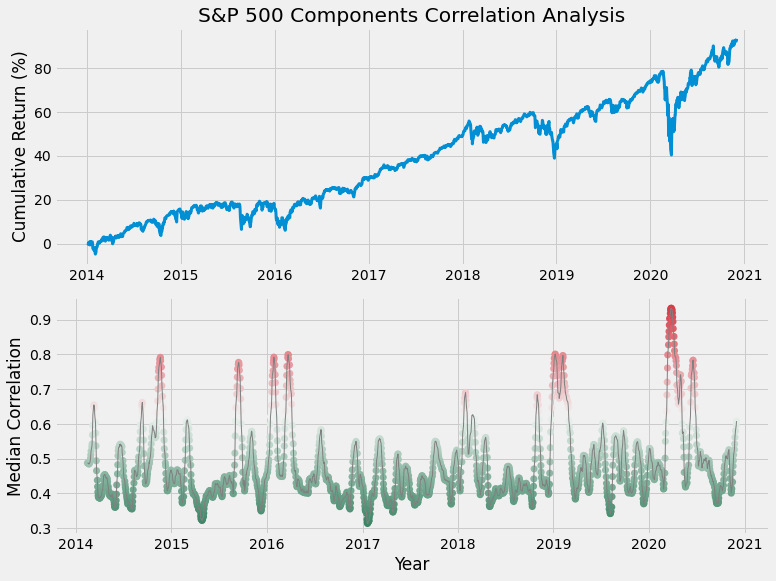

In [51]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,sharex=False)
ax1.plot(spy['return'].cumsum()*100,lw=3)
ax1.set_ylabel('Cumulative Return (%)');

ax2.plot(cor_df.index,cor_df['corr'],'-',lw=1,color='gray')
sns.scatterplot(cor_df.index,cor_df['corr'],hue=cor_df['corr'],s=50,linewidth=0,\
                palette=sns.diverging_palette(150, 10, n=3, as_cmap=True,),legend=None,ax=ax2);
ax2.set_xlabel('Year');
#ax2.set_label('% of S&P500 Stocks with High Correlation')
ax2.set_ylabel('Median Correlation')
fig.tight_layout()
ax1.set_title('S&P 500 Components Correlation Analysis')
plt.savefig('sp500_corrs_scatter.png', bbox_inches = 'tight', format = 'png', dpi = DPI);

In [43]:
len(cor_df[cor_df.values>=0.8])

20

***
# XLK Components Correlation Analysis

In [14]:
xlk_portfolio=pd.read_csv('xlk.csv')

In [15]:
# download historical stock data
data,xlk=download_stocks(xlk_portfolio.Symbol,'XLK', start,end)

100%|███████████████████████████████████████████████████████████████████████████████| 75/75 [00:45<00:00,  1.67it/s]


In [16]:
xlk_cor_df = pd.DataFrame(index = xlk.index[window:])
xlk_cor_df['corr'] = [median_cor(data.iloc[i-window:i,:],'spearman') for i in range(window,len(data))]

In [17]:
xlk['return']=xlk['Adj Close'].pct_change()

C:\Users\Dr.Amir\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


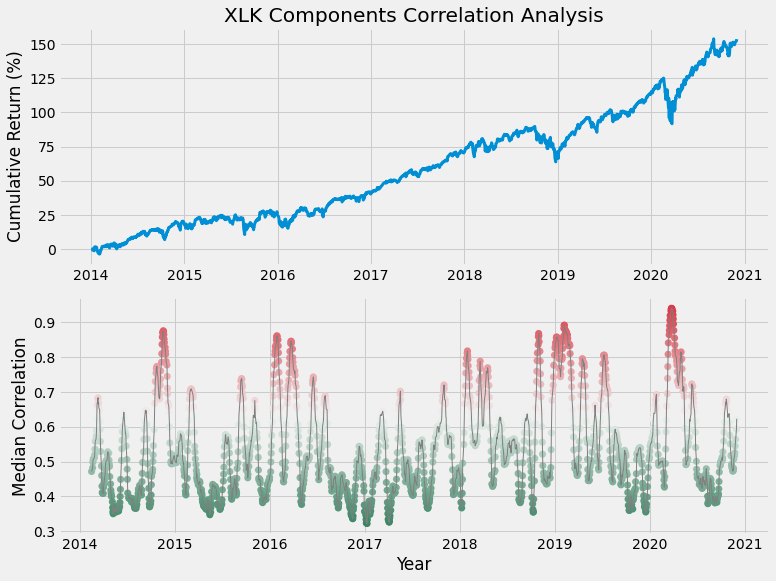

In [52]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,sharex=False)
ax1.plot(xlk['return'].cumsum()*100,lw=3)
ax1.set_ylabel('Cumulative Return (%)');

ax2.plot(xlk_cor_df.index,xlk_cor_df['corr'],'-',lw=1,color='gray')
sns.scatterplot(xlk_cor_df.index,xlk_cor_df['corr'],hue=xlk_cor_df['corr'],s=50,linewidth=0,\
                palette=sns.diverging_palette(150, 10, n=3, as_cmap=True,),legend=None,ax=ax2);
ax2.set_xlabel('Year');
#ax2.set_label('% of S&P500 Stocks with High Correlation')
ax2.set_ylabel('Median Correlation')
fig.tight_layout()
ax1.set_title('XLK Components Correlation Analysis')
plt.savefig('XLK_corrs_scatter.png', bbox_inches = 'tight', format = 'png', dpi = DPI);

In [42]:
len(xlk_cor_df[xlk_cor_df.values>=0.8])

100

***
# XLI Components Correlation Analysis

In [20]:
xli_portfolio=pd.read_csv('xli.csv')

In [21]:
# download historical stock data
data,xli=download_stocks(xlk_portfolio.Symbol,'XLI', start,end)

100%|███████████████████████████████████████████████████████████████████████████████| 75/75 [00:47<00:00,  1.58it/s]


In [22]:
xli_cor_df = pd.DataFrame(index = xli.index[window:])
xli_cor_df['corr'] = [median_cor(data.iloc[i-window:i,:],'spearman') for i in range(window,len(data))]

In [23]:
xli['return']=xli['Adj Close'].pct_change()

C:\Users\Dr.Amir\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


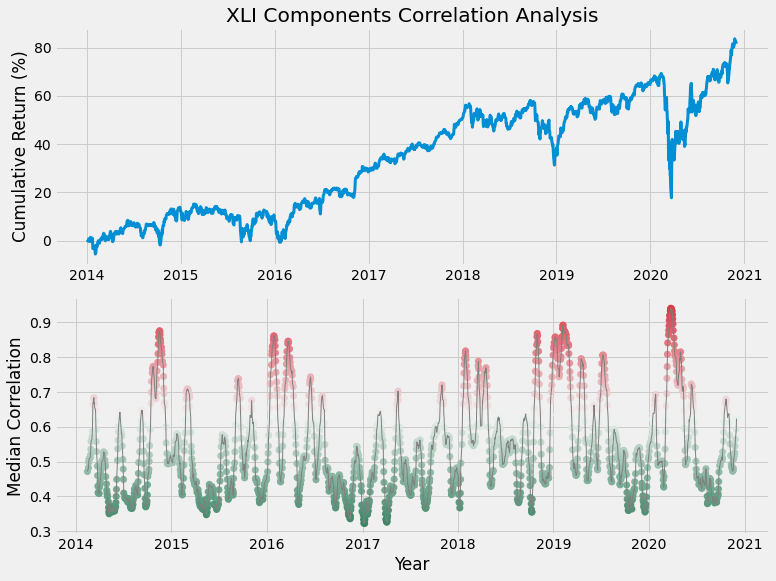

In [53]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,sharex=False)
ax1.plot(xli['return'].cumsum()*100,lw=3)
ax1.set_ylabel('Cumulative Return (%)');

ax2.plot(xli_cor_df.index,xli_cor_df['corr'],'-',lw=1,color='gray')
sns.scatterplot(xli_cor_df.index,xli_cor_df['corr'],hue=xli_cor_df['corr'],s=50,linewidth=0,\
                palette=sns.diverging_palette(150, 10, n=3, as_cmap=True,),legend=None,ax=ax2);
ax2.set_xlabel('Year');
#ax2.set_label('% of S&P500 Stocks with High Correlation')
ax2.set_ylabel('Median Correlation')
fig.tight_layout()
ax1.set_title('XLI Components Correlation Analysis')
plt.savefig('XLI_corrs_scatter.png', bbox_inches = 'tight', format = 'png', dpi = DPI);

In [44]:
len(xli_cor_df[xli_cor_df.values>=0.8])

100